In [3]:
import numpy as np
import matplotlib as mpl
import matplotlib.style
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import mlrose_hiive as mlrose

import sklearn
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neural_network import MLPClassifier

import time
import random

## Part II 

Replace NN Backpropagation with mlrose optimization algorithms.

### Read data and process data

In [15]:
df = pd.read_csv('./FoodBalance.csv')
df.head()

,Area Code,Area,Item Code,Item,Element Code,Element,cat,Unit,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019
0,10,Australia,2901,Grand Total,664,Food supply (kcal/capita/day),0.0,kcal/capita/day,3410.00,3390.00,3437.00,3429.00,3413.00,3401.00,3428.00,3404.00,3394.00,3417.00
1,10,Australia,2901,Grand Total,674,Protein supply quantity (g/capita/day),0.0,g/capita/day,110.87,110.66,110.10,109.40,107.83,108.23,108.97,106.74,107.51,107.94
2,10,Australia,2901,Grand Total,684,Fat supply quantity (g/capita/day),1.0,g/capita/day,151.27,155.21,156.43,152.66,158.20,159.48,160.69,158.98,160.48,159.73
3,10,Australia,2903,Vegetal Products,664,Food supply (kcal/capita/day),0.0,kcal/capita/day,2363.00,2327.00,2368.00,2373.00,2345.00,2301.00,2304.00,2320.00,2295.00,2318.00
4,10,Australia,2903,Vegetal Products,674,Protein supply quantity (g/capita/day),1.0,g/capita/day,36.81,34.82,35.30,35.56,34.59,34.22,34.38,34.91,35.24,35.03


In [16]:
X_desc = df.drop(['Area Code', 'Area', 'Item Code', 'Item', 'Element Code', 'Element', 'Unit', 'cat'], axis = 1)
X_desc.fillna(0, inplace = True)

y = df['cat']

scaler = StandardScaler()
scaler.fit(X_desc)
X_scaled = scaler.transform(X_desc)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2)

In [17]:
X_scaled

array([[ 4.42370188,  4.63484102,  4.33185752, ...,  3.51310845,
         4.08779745,  4.32555386],
       [ 0.07810408,  0.08204005,  0.07234062, ...,  0.04733092,
         0.06238297,  0.06852668],
       [ 0.13131876,  0.14389009,  0.13165813, ...,  0.10224082,
         0.12726258,  0.13515329],
       ...,
       [-0.06134736, -0.06603906, -0.06350198, ..., -0.06065995,
        -0.06439991, -0.06518966],
       [-0.0677621 , -0.07142577, -0.06846965, ..., -0.06473825,
        -0.06915228, -0.07016833],
       [-0.0678543 , -0.07150907, -0.06854647, ..., -0.06481183,
        -0.06922577, -0.07027124]])

## Gradient descent

In [18]:
# Gradient descent
mpl.style.use('classic')
estimator = mlrose.NeuralNetwork(hidden_nodes=[100], activation='relu', \
                                 algorithm='gradient_descent', max_iters=100, \
                                 bias=True, is_classifier=True, learning_rate=0.001, \
                                 early_stopping=False, clip_max=5000, max_attempts=10, \
                                 random_state=1, curve=True)

start = time.time()
estimator.fit(X_train, y_train)
end = time.time()

y_train_pred = estimator.predict(X_train)
training_score = accuracy_score(y_train, y_train_pred)
y_test_pred = estimator.predict(X_test)
test_score = accuracy_score(y_test, y_test_pred)
print('Traning accuracy is {}'.format(training_score))
print('Test accuracy is {}'.format(test_score))
print('Training time is {} s'.format((end-start)))
plt.plot(estimator.fitness_curve)
plt.title('Fitness Curve (gradient descent)', fontsize=20)
plt.xlabel('Iterations', fontsize=20)
plt.ylabel('-Log_loss', fontsize=20);
plt.savefig('ds2_gd_fig0', bbox_inches='tight')

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [19]:
# Confusion matrix after tuning hyperparameters

cm = confusion_matrix(y_test, y_test_pred)

ax = plt.subplot()
sns.set(font_scale=3.0)
sns.heatmap(cm, annot=True, ax=ax, cmap="viridis_r", fmt="g");  

# Labels, title and ticks
label_font = {'size':'25'} 
ax.set_xlabel('Predicted labels', fontdict=label_font);
ax.set_ylabel('Observed labels', fontdict=label_font);

title_font = {'size':'30'}
ax.set_title('Confusion Matrix (gradient descent)', fontdict=title_font);

ax.tick_params(axis='both', which='major', labelsize=25)  # Adjust to fit
ax.xaxis.set_ticklabels(['Insoluble', 'Soluble']);
ax.yaxis.set_ticklabels(['Insoluble', 'Soluble']);
plt.savefig('ds2_gd_fig0', bbox_inches='tight')
plt.show()

ValueError: Found input variables with inconsistent numbers of samples: [3590, 226]

- The fitness curve using gradient descent is very smooth
- It converges at about ~60 to 80 iterations

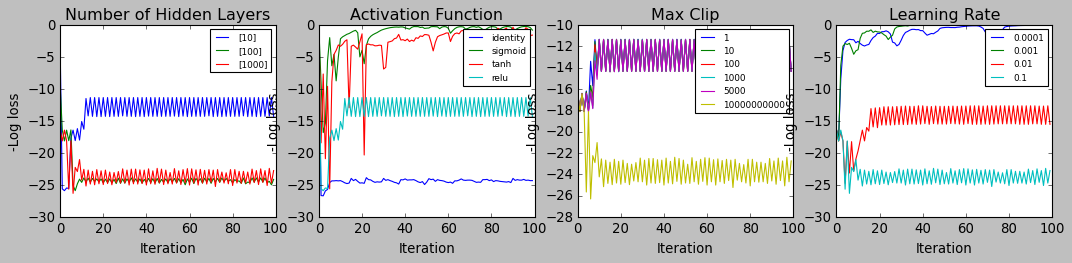

In [8]:
# MC plots
mpl.style.use('classic')
plt.rc('legend', fontsize=8)

fig, axes = plt.subplots(1, 4, figsize=(16, 3))
sizes = [[10], [100], [1000]]
for s in sizes:
    estimator = mlrose.NeuralNetwork(hidden_nodes=s, activation='relu', algorithm='gradient_descent', \
                                     max_iters=100, bias=True, is_classifier=True, learning_rate=0.1, \
                                     early_stopping=False, clip_max=10000000000, max_attempts=10, \
                                     random_state=1, curve=True)
    estimator.fit(X_train, y_train)
    axes[0].plot(estimator.fitness_curve)
axes[0].legend(sizes)
#axes[0].title('Number of Hidden Layers')

#test activation function
acts = ['identity', 'sigmoid', 'tanh', 'relu']
for a in acts:
    estimator = mlrose.NeuralNetwork(hidden_nodes=[10], activation=a, algorithm='gradient_descent', \
                                     max_iters=100, bias=True, is_classifier=True, learning_rate=0.1, \
                                     early_stopping=False, clip_max=10000000000, max_attempts=10, \
                                     random_state=1, curve=True)
    estimator.fit(X_train, y_train)
    axes[1].plot(estimator.fitness_curve, label='a')
axes[1].legend(acts)
#axes[1].title('Activation function')

#test clip max: range of weights
clip_max = [1, 10, 100, 1000, 5000, 10000000000]
for c in clip_max:
    estimator = mlrose.NeuralNetwork(hidden_nodes=[1000], activation='relu', algorithm='gradient_descent', \
                                     max_iters=100, bias=True, is_classifier=True, learning_rate=0.1, \
                                     early_stopping=False, clip_max=c, max_attempts=10, \
                                     random_state=1, curve=True)
    estimator.fit(X_train, y_train)
    axes[2].plot(estimator.fitness_curve, label=c)
axes[2].legend(clip_max)

learn_rate = [0.0001, 0.001, 0.01, 0.1]
for l in learn_rate:
    estimator = mlrose.NeuralNetwork(hidden_nodes=[1000], activation='relu', \
                                     algorithm='gradient_descent', max_iters=100, \
                                     bias=True, is_classifier=True, learning_rate=l, \
                                     early_stopping=False, clip_max=10000000000.0, max_attempts=10, \
                                     random_state=1, curve=True)
    estimator.fit(X_train, y_train)
    axes[3].plot(estimator.fitness_curve, label=l)
axes[3].legend(learn_rate)

#axes[2].title('Solvers')
axes[0].set_title('Number of Hidden Layers')
axes[1].set_title('Activation Function')
axes[2].set_title('Max Clip')
axes[3].set_title('Learning Rate')

for ax in axes:
    ax.set(xlabel='Iteration', ylabel='-Log loss')

# Hide x labels and tick labels for top plots and y ticks for right plots.
#for ax in axes:
#    ax.label_outer()

plt.savefig('ds2_gd_fig2', bbox_inches='tight')

Traning accuracy is 0.9994456762749445
Test accuracy is 0.9075221238938053
Training time is 1.8850470781326294 s


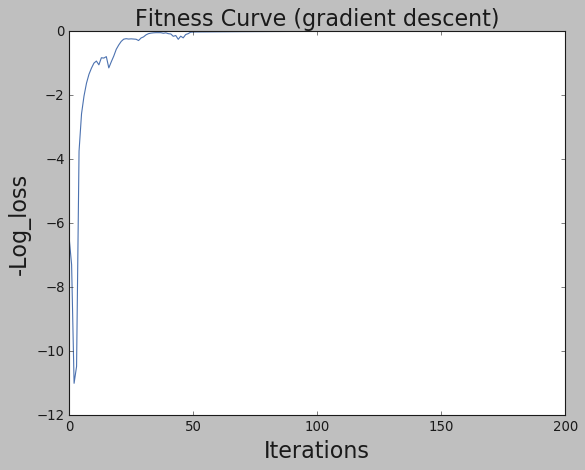

In [227]:
# Gradient descent after tuning
mpl.style.use('classic')
states = [19, 22, 30, 35, 2, 72, 45, 27, 87, 61] #pre-generated randome numbers

training_score = []
test_score = []
train_time = []

for s in states:
    estimator = mlrose.NeuralNetwork(hidden_nodes=[100], activation='relu', \
                                 algorithm='gradient_descent', max_iters=200, \
                                 bias=True, is_classifier=True, learning_rate=0.001, \
                                 early_stopping=False, clip_max=10000000000, max_attempts=10, \
                                 random_state=s, curve=True)

    start = time.time()
    estimator.fit(X_train, y_train)
    train_time.append(time.time() - start)

    y_train_pred = estimator.predict(X_train)
    training_score.append(accuracy_score(y_train, y_train_pred))
    y_test_pred = estimator.predict(X_test)
    test_score.append(accuracy_score(y_test, y_test_pred))
print('Traning accuracy is {}'.format(np.mean(training_score)))
print('Test accuracy is {}'.format(np.mean(test_score)))
print('Training time is {} s'.format(np.mean(train_time)))
plt.plot(estimator.fitness_curve)
plt.title('Fitness Curve (gradient descent)', fontsize=20)
plt.xlabel('Iterations', fontsize=20)
plt.ylabel('-Log_loss', fontsize=20)
plt.savefig('ds2_gd_fig3', bbox_inches='tight')

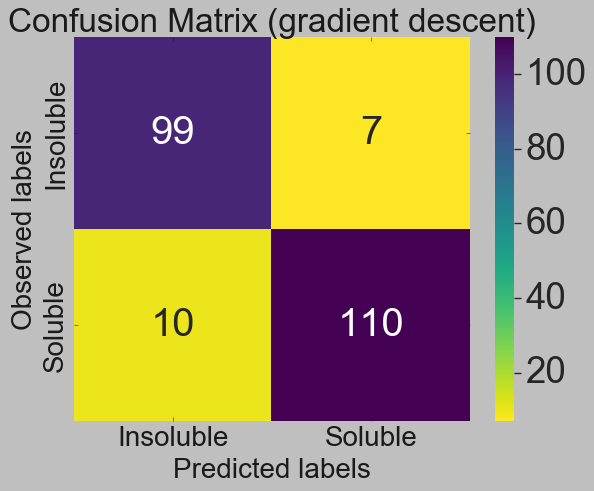

In [228]:
# Confusion matrix after tuning hyperparameters

cm = confusion_matrix(y_test, y_test_pred)

ax = plt.subplot()
sns.set(font_scale=3.0)
sns.heatmap(cm, annot=True, ax=ax, cmap="viridis_r", fmt="g");  

# Labels, title and ticks
label_font = {'size':'25'} 
ax.set_xlabel('Predicted labels', fontdict=label_font);
ax.set_ylabel('Observed labels', fontdict=label_font);

title_font = {'size':'30'}
ax.set_title('Confusion Matrix (gradient descent)', fontdict=title_font);

ax.tick_params(axis='both', which='major', labelsize=25)  # Adjust to fit
ax.xaxis.set_ticklabels(['Insoluble', 'Soluble']);
ax.yaxis.set_ticklabels(['Insoluble', 'Soluble']);
plt.savefig('ds2_gd_fig4', bbox_inches='tight')
plt.show()

# RHC for NN

- Fitness curve of random hill climbing seems to be stepwise, with zigzag shape. 

- Large changes are seen at certain iterations, and plateaus are seen at certain stages

Traning accuracy is 0.46119733924611966
Test accuracy is 0.41150442477876104
Training time is 1.1794018268585205 s


/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


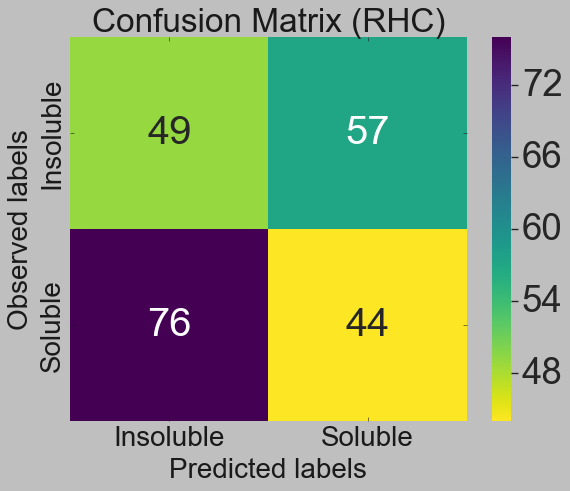

In [207]:
# Initialize MLrose model and train with Random_hill_climb
mpl.style.use('classic')
states = [19, 22, 30, 35, 2, 72, 45, 27, 87, 61] #pre-generated randome numbers

training_score = []
test_score = []
train_time = []
for s in states:
    estimator = mlrose.NeuralNetwork(hidden_nodes=[100], activation='relu', 
                                 algorithm='random_hill_climb', max_iters=100, 
                                 bias=True, is_classifier=True, learning_rate=0.001, 
                                 early_stopping=False, clip_max=5000, max_attempts=10, 
                                 random_state=s, curve=True)
    start = time.time()
    nn_model1.fit(X_train, y_train)
    train_time.append(time.time() - start)

    y_train_pred = nn_model1.predict(X_train)
    training_score.append(accuracy_score(y_train, y_train_pred))
    y_test_pred = nn_model1.predict(X_test)
    test_score.append(accuracy_score(y_test, y_test_pred))

print('Traning accuracy is {}'.format(np.mean(training_score)))
print('Test accuracy is {}'.format(np.mean(test_score)))
print('Training time is {} s'.format(np.mean(train_time)))
plt.plot(nn_model1.fitness_curve)
plt.title('Fitness Curve (RHC)', fontsize=20)
plt.xlabel('Iterations', fontsize=20)
plt.ylabel('-Log_loss', fontsize=20);
plt.savefig('ds2_rhc_fig0', bbox_inches='tight')

# Confusion matrix after tuning hyperparameters
cm = confusion_matrix(y_test, y_test_pred)

ax = plt.subplot()
sns.set(font_scale=3.0)
sns.heatmap(cm, annot=True, ax=ax, cmap="viridis_r", fmt="g");  

# Labels, title and ticks
label_font = {'size':'25'} 
ax.set_xlabel('Predicted labels', fontdict=label_font);
ax.set_ylabel('Observed labels', fontdict=label_font);

title_font = {'size':'30'}
ax.set_title('Confusion Matrix (RHC)', fontdict=title_font);

ax.tick_params(axis='both', which='major', labelsize=25)  # Adjust to fit
ax.xaxis.set_ticklabels(['Insoluble', 'Soluble']);
ax.yaxis.set_ticklabels(['Insoluble', 'Soluble']);
plt.savefig('ds2_rhc_fig1', bbox_inches='tight')
plt.show()

## Grid search for RHC

In [210]:
# grid search for RHC in the space of restarts and learning_rate

restarts = [0, 5, 10, 15, 20]
lrs = [0.1, 0.01, 0.001, 0.0001]
train_scores = np.zeros((len(restarts), len(lrs)))
test_scores = np.zeros((len(restarts), len(lrs)))
for i in range(len(restarts)):
    for j in range(len(lrs)):
        estimator = mlrose.NeuralNetwork(hidden_nodes=[10], activation='relu', \
                                 algorithm='random_hill_climb', max_iters=100, \
                                 bias=True, is_classifier=True, learning_rate=lrs[j], restarts = restarts[i],\
                                 early_stopping=False, max_attempts=10, \
                                 random_state=1, curve=True)
        estimator.fit(X_train, y_train)
        y_train_pred = estimator.predict(X_train)
        train_scores[i,j] = accuracy_score(y_train, y_train_pred)
        y_test_pred = estimator.predict(X_test)
        test_scores[i,j] = accuracy_score(y_test, y_test_pred)

fig, axes = plt.subplots(1,2, figsize=(8,3))
X,Y = np.meshgrid(lrs, restarts)
CS = axes[0].contour(X, Y, train_scores)
axes[0].clabel(CS, inline=True, fontsize=10)
CS = axes[1].contour(X, Y, test_scores)
axes[1].clabel(CS, inline=True, fontsize=10)
train_scores

array([[0.55432373, 0.54988914, 0.54988914, 0.54988914],
       [0.5631929 , 0.55210643, 0.54988914, 0.54988914],
       [0.56762749, 0.55210643, 0.54988914, 0.54988914],
       [0.55210643, 0.54988914, 0.54988914, 0.54988914],
       [0.55210643, 0.54988914, 0.54988914, 0.54988914]])

In [211]:
test_scores

array([[0.54867257, 0.5619469 , 0.5619469 , 0.5619469 ],
       [0.55752212, 0.5619469 , 0.5619469 , 0.5619469 ],
       [0.56637168, 0.5619469 , 0.5619469 , 0.5619469 ],
       [0.56637168, 0.5619469 , 0.5619469 , 0.5619469 ],
       [0.56637168, 0.5619469 , 0.5619469 , 0.5619469 ]])

<a list of 6 text.Text objects>

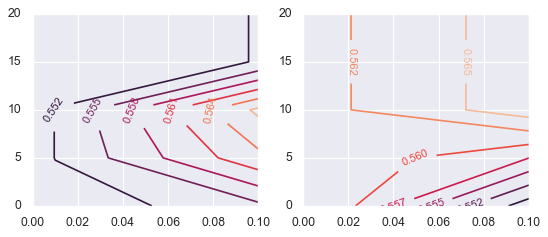

In [216]:
fig, axes = plt.subplots(1,2, figsize=(8,3))
X,Y = np.meshgrid(lrs, restarts)
CS = axes[0].contour(X, Y, train_scores)
axes[0].clabel(CS, inline=True, fontsize=10)
CS = axes[1].contour(X, Y, test_scores)
axes[1].clabel(CS, inline=True, fontsize=10)

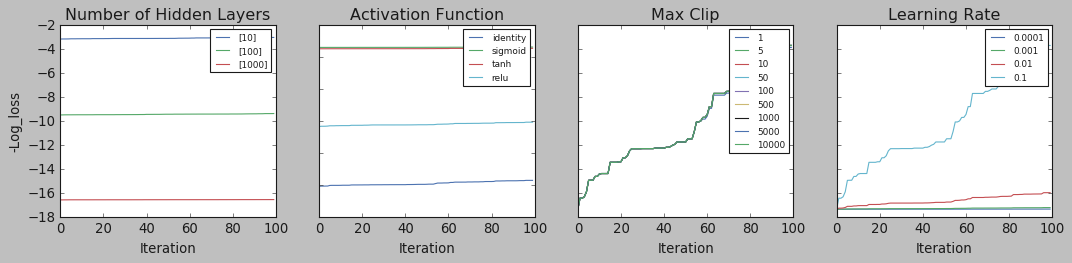

In [93]:
# MC plots for "Random_hill_climb"
mpl.style.use('classic')
plt.rc('legend', fontsize=8)

fig, axes = plt.subplots(1, 4, figsize=(16, 3))
sizes = [[10], [100], [1000]]
for s in sizes:
    estimator = mlrose.NeuralNetwork(hidden_nodes=s, activation='relu', algorithm='random_hill_climb', \
                                     max_iters=100, bias=True, is_classifier=True, learning_rate=0.1, \
                                     early_stopping=False, clip_max=10000000000, max_attempts=10, \
                                     random_state=1, curve=True)
    estimator.fit(X_train, y_train)
    axes[0].plot(estimator.fitness_curve)
axes[0].legend(sizes)
#axes[0].title('Number of Hidden Layers')

#test activation function
acts = ['identity', 'sigmoid', 'tanh', 'relu']
for a in acts:
    estimator = mlrose.NeuralNetwork(hidden_nodes=[10], activation=a, algorithm='random_hill_climb', \
                                     max_iters=100, bias=True, is_classifier=True, learning_rate=0.1, \
                                     early_stopping=False, clip_max=10000000000, max_attempts=10, \
                                     random_state=1, curve=True)
    estimator.fit(X_train, y_train)
    axes[1].plot(estimator.fitness_curve, label='a')
axes[1].legend(acts)
#axes[1].title('Activation function')

#test clip max: range of weights
clip_max = [1, 5, 10, 50, 100, 500, 1000, 5000, 10000]
for c in clip_max:
    estimator = mlrose.NeuralNetwork(hidden_nodes=[10], activation='relu', algorithm='random_hill_climb', \
                                     max_iters=100, bias=True, is_classifier=True, learning_rate=0.1, \
                                     early_stopping=False, clip_max=c, max_attempts=10, \
                                     random_state=1, curve=True)
    estimator.fit(X_train, y_train)
    axes[2].plot(estimator.fitness_curve, label=c)
axes[2].legend(clip_max)

learn_rate = [0.0001, 0.001, 0.01, 0.1]
for l in learn_rate:
    estimator = mlrose.NeuralNetwork(hidden_nodes=[10], activation='relu', \
                                     algorithm='random_hill_climb', max_iters=100, \
                                     bias=True, is_classifier=True, learning_rate=l, \
                                     early_stopping=False, clip_max=10000000000.0, max_attempts=10, \
                                     random_state=1, curve=True)
    estimator.fit(X_train, y_train)
    scores = estimator.fitness_curve
    plt.plot(scores, label=l)
axes[3].legend(learn_rate)

#axes[2].title('Solvers')
axes[0].set_title('Number of Hidden Layers')
axes[1].set_title('Activation Function')
axes[2].set_title('Max Clip')
axes[3].set_title('Learning Rate')

for ax in axes:
    ax.set(xlabel='Iteration', ylabel='-Log_loss')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axes:
    ax.label_outer()

plt.savefig('ds2_rhc_fig2', bbox_inches='tight')

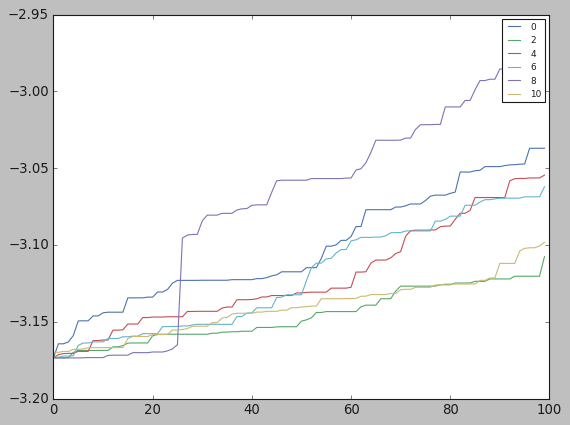

In [94]:
mpl.style.use('classic')
plt.rc('legend', fontsize=8)
restarts = [0, 2, 4, 6, 8, 10]
for r in restarts:
    estimator = mlrose.NeuralNetwork(hidden_nodes=[10], activation='relu', \
                                     algorithm='random_hill_climb', max_iters=100, \
                                     bias=True, is_classifier=True, learning_rate=0.1, restarts = r,\
                                     early_stopping=False, clip_max=10000000000.0, max_attempts=10, \
                                     random_state=1, curve=True)
    estimator.fit(X_train, y_train)
    scores = estimator.fitness_curve
    plt.plot(scores, label=r)
    
plt.legend(restarts)

#axes[2].title('Solvers')

Traning accuracy is 0.5474501108647449
Test accuracy is 0.5584070796460177
Training time is 1.0161760568618774 s


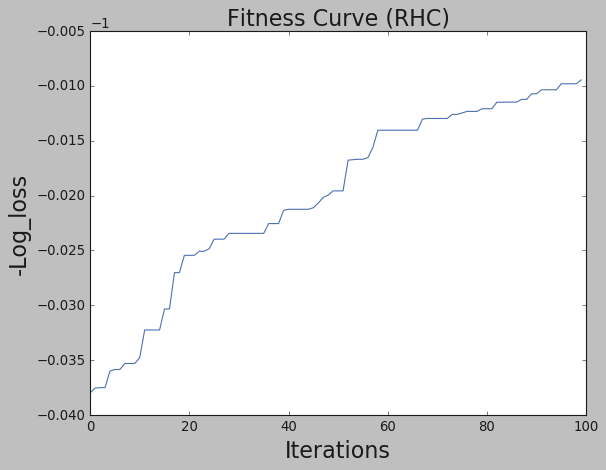

In [173]:
# Initialize MLrose model and train with Random_hill_climb
mpl.style.use('classic')
states = [19, 22, 30, 35, 2, 72, 45, 27, 87, 61] #pre-generated randome numbers

training_score = []
test_score = []
train_time = []
for s in states:
    nn_model1 = mlrose.NeuralNetwork(hidden_nodes=[10], activation='tanh', \
                                 algorithm='random_hill_climb', max_iters=100, \
                                 bias=True, is_classifier=True, learning_rate=0.1, restarts=8,\
                                 early_stopping=False, clip_max=100, max_attempts=100, \
                                 random_state=s, curve=True)

    start = time.time()
    nn_model1.fit(X_train, y_train)
    train_time.append(time.time() - start)

    y_train_pred = nn_model1.predict(X_train)
    training_score.append(accuracy_score(y_train, y_train_pred))
    y_test_pred = nn_model1.predict(X_test)
    test_score.append(accuracy_score(y_test, y_test_pred))
print('Traning accuracy is {}'.format(np.mean(training_score)))
print('Test accuracy is {}'.format(np.mean(test_score)))
print('Training time is {} s'.format(np.mean(train_time)))
plt.plot(nn_model1.fitness_curve)
plt.title('Fitness Curve (RHC)', fontsize=20)
plt.xlabel('Iterations', fontsize=20)
plt.ylabel('-Log_loss', fontsize=20)
plt.savefig('ds2_rhc_fig3', bbox_inches='tight')

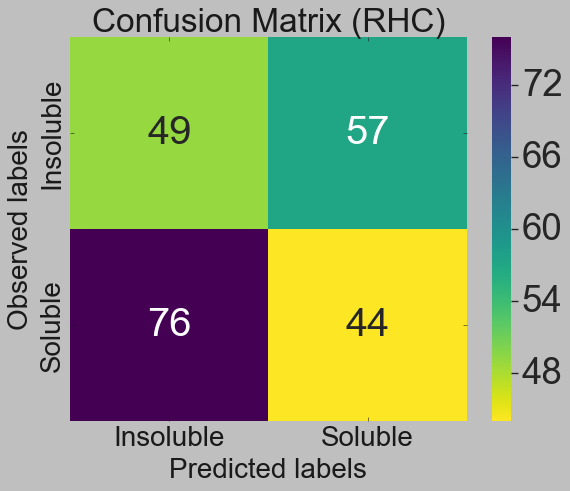

In [174]:
# Confusion matrix after tuning hyperparameters
cm = confusion_matrix(y_test, y_test_pred)

ax = plt.subplot()
sns.set(font_scale=3.0)
sns.heatmap(cm, annot=True, ax=ax, cmap="viridis_r", fmt="g");  

# Labels, title and ticks
label_font = {'size':'25'} 
ax.set_xlabel('Predicted labels', fontdict=label_font);
ax.set_ylabel('Observed labels', fontdict=label_font);

title_font = {'size':'30'}
ax.set_title('Confusion Matrix (RHC)', fontdict=title_font);

ax.tick_params(axis='both', which='major', labelsize=25)  # Adjust to fit
ax.xaxis.set_ticklabels(['Insoluble', 'Soluble']);
ax.yaxis.set_ticklabels(['Insoluble', 'Soluble']);
plt.savefig('ds2_rhc_fig4', bbox_inches='tight')
plt.show()

## NN optimization with SA

Traning accuracy is 0.5140798226164082
Test accuracy is 0.5181415929203539
Training time is 0.46152195930480955 s


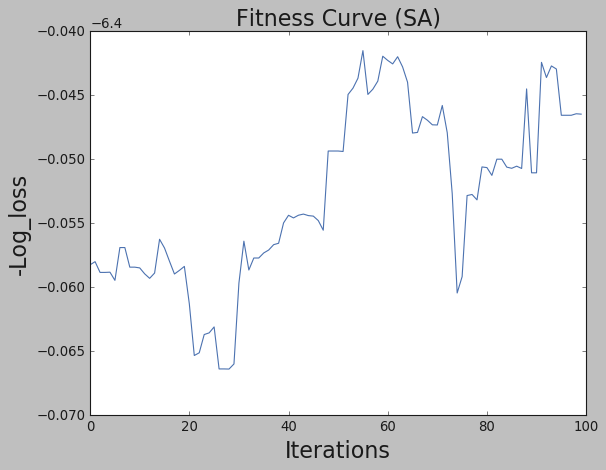

In [178]:
# Initialize MLrose model and train with simulated annealing
mpl.style.use('classic')

states = [19, 22, 30, 35, 2, 72, 45, 27, 87, 61] #pre-generated randome numbers

training_score = 0
test_score = 0
train_time = 0

for s in states:
    start = time.time()
    nn_model2 = mlrose.NeuralNetwork(hidden_nodes=[100], activation='relu', \
                                 algorithm='simulated_annealing', max_iters=100, \
                                 bias=True, is_classifier=True, learning_rate=0.1, \
                                 early_stopping=False, clip_max=5, max_attempts=100, \
                                 random_state=s, curve=True)
    
    nn_model2.fit(X_train, y_train)
    train_time += time.time() - start
    y_train_pred = nn_model2.predict(X_train)
    training_score += accuracy_score(y_train, y_train_pred)
    y_test_pred = nn_model2.predict(X_test)
    test_score += accuracy_score(y_test, y_test_pred)

print('Traning accuracy is {}'.format(training_score / 10))
print('Test accuracy is {}'.format(test_score / 10))
print('Training time is {} s'.format(train_time / 10))
plt.plot(nn_model2.fitness_curve)
plt.title('Fitness Curve (SA)', fontsize=20)
plt.xlabel('Iterations', fontsize=20)
plt.ylabel('-Log_loss', fontsize=20)
plt.savefig('ds2_sa_fig0', bbox_inches='tight')

## Grid search for SA

In [219]:
# grid search for RHC in the space of restarts and learning_rate

temps = [10, 100, 1000, 1000]
lrs = [0.1, 0.01, 0.001, 0.0001]
train_scores = np.zeros((len(temps), len(lrs)))
test_scores = np.zeros((len(temps), len(lrs)))
for i in range(len(temps)):
    for j in range(len(lrs)):
        schedule = mlrose.GeomDecay(init_temp = temps[i], decay=0.99, min_temp=1)
        estimator = mlrose.NeuralNetwork(hidden_nodes=[10], activation='relu', \
                                 algorithm='simulated_annealing', max_iters=100, \
                                 bias=True, is_classifier=True, learning_rate=lrs[j], schedule=schedule,\
                                 early_stopping=False, clip_max=5000, max_attempts=10, \
                                 random_state=1, curve=True)
        estimator.fit(X_train, y_train)
        y_train_pred = estimator.predict(X_train)
        train_scores[i,j] = accuracy_score(y_train, y_train_pred)
        y_test_pred = estimator.predict(X_test)
        test_scores[i,j] = accuracy_score(y_test, y_test_pred)

train_scores

array([[0.55099778, 0.55099778, 0.54988914, 0.54988914],
       [0.55099778, 0.55099778, 0.54988914, 0.54988914],
       [0.55099778, 0.55099778, 0.54988914, 0.54988914],
       [0.55099778, 0.55099778, 0.54988914, 0.54988914]])

<a list of 7 text.Text objects>

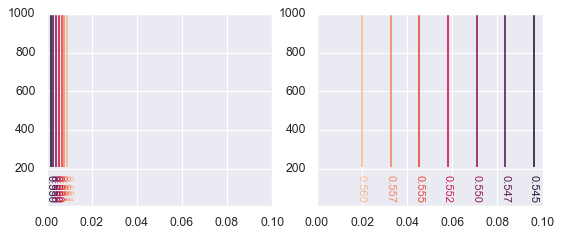

In [220]:
fig, axes = plt.subplots(1,2, figsize=(8,3))
X,Y = np.meshgrid(lrs, temps)
CS = axes[0].contour(X, Y, train_scores)
axes[0].clabel(CS, inline=True, fontsize=10)
CS = axes[1].contour(X, Y, test_scores)
axes[1].clabel(CS, inline=True, fontsize=10)

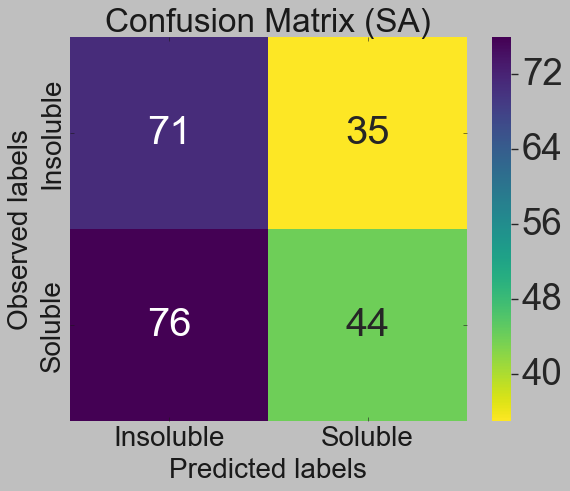

In [179]:
# Confusion matrix after tuning hyperparameters
cm = confusion_matrix(y_test, y_test_pred)

ax = plt.subplot()
sns.set(font_scale=3.0)
sns.heatmap(cm, annot=True, ax=ax, cmap="viridis_r", fmt="g");  

# Labels, title and ticks
label_font = {'size':'25'} 
ax.set_xlabel('Predicted labels', fontdict=label_font);
ax.set_ylabel('Observed labels', fontdict=label_font);

title_font = {'size':'30'}
ax.set_title('Confusion Matrix (SA)', fontdict=title_font);

ax.tick_params(axis='both', which='major', labelsize=25)  # Adjust to fit
ax.xaxis.set_ticklabels(['Insoluble', 'Soluble']);
ax.yaxis.set_ticklabels(['Insoluble', 'Soluble']);
plt.savefig('ds2_sa_fig1', bbox_inches='tight')
plt.show()

- Fitness curve for simulated annealing is a lot wavier
- At certain steps, decreased fitness is observed

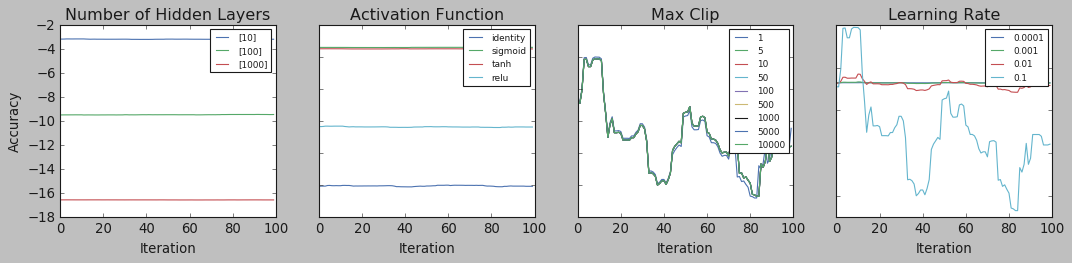

In [104]:
# MC plots
mpl.style.use('classic')
plt.rc('legend', fontsize=8)

fig, axes = plt.subplots(1, 4, figsize=(16, 3))
sizes = [[10], [100], [1000]]
for s in sizes:
    
    estimator = mlrose.NeuralNetwork(hidden_nodes=s, activation='relu', algorithm='simulated_annealing', \
                                     max_iters=100, bias=True, is_classifier=True, learning_rate=0.1, \
                                     early_stopping=False, clip_max=10000000000, max_attempts=10, \
                                     random_state=1, curve=True)
    estimator.fit(X_train, y_train)
    axes[0].plot(estimator.fitness_curve)
axes[0].legend(sizes)
#axes[0].title('Number of Hidden Layers')

#test activation function
acts = ['identity', 'sigmoid', 'tanh', 'relu']
for a in acts:
    estimator = mlrose.NeuralNetwork(hidden_nodes=[10], activation=a, algorithm='simulated_annealing', \
                                     max_iters=100, bias=True, is_classifier=True, learning_rate=0.1, \
                                     early_stopping=False, clip_max=10000000000, max_attempts=10, \
                                     random_state=1, curve=True)
    estimator.fit(X_train, y_train)
    axes[1].plot(estimator.fitness_curve, label='a')
axes[1].legend(acts)
#axes[1].title('Activation function')

#test clip max: range of weights
clip_max = [1, 5, 10, 50, 100, 500, 1000, 5000, 10000]
for c in clip_max:
    estimator = mlrose.NeuralNetwork(hidden_nodes=[10], activation='relu', algorithm='simulated_annealing', \
                                     max_iters=100, bias=True, is_classifier=True, learning_rate=0.1, \
                                     early_stopping=False, clip_max=c, max_attempts=10, \
                                     random_state=1, curve=True)
    estimator.fit(X_train, y_train)
    axes[2].plot(estimator.fitness_curve, label=c)
axes[2].legend(clip_max)

learn_rate = [0.0001, 0.001, 0.01, 0.1]
for l in learn_rate:
    estimator = mlrose.NeuralNetwork(hidden_nodes=[10], activation='relu', \
                                     algorithm='simulated_annealing', max_iters=100, \
                                     bias=True, is_classifier=True, learning_rate=l, \
                                     early_stopping=False, clip_max=10000000000.0, max_attempts=10, \
                                     random_state=1, curve=True)
    estimator.fit(X_train, y_train)
    axes[3].plot(estimator.fitness_curve, label=l)
axes[3].legend(learn_rate)

#axes[2].title('Solvers')
axes[0].set_title('Number of Hidden Layers')
axes[1].set_title('Activation Function')
axes[2].set_title('Max Clip')
axes[3].set_title('Learning Rate')

for ax in axes:
    ax.set(xlabel='Iteration', ylabel='-Log loss')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axes:
    ax.label_outer()

plt.savefig('ds2_sa_fig2', bbox_inches='tight')

In [ ]:
mpl.style.use('classic')
plt.rc('legend', fontsize=8)

schedules = [mlrose.GeomDecay(init_temp = 1000, decay=0.99, min_temp=0.001), 
             mlrose.ArithDecay(init_temp=1000, decay=0.0001, min_temp=0.001),
             mlrose.ExpDecay(init_temp=1000, exp_const=0.005, min_temp=0.001)]
labels = ['GeomDecay', 'ArithDecay', 'ExpDecay']
i=1
for s in schedules:
    estimator = mlrose.NeuralNetwork(hidden_nodes=[10], activation='sigmoid', \
                                     algorithm='simulated_annealing', max_iters=100, \
                                     bias=True, is_classifier=True, learning_rate=0.1, schedule=s, \
                                     early_stopping=False, clip_max=10000000000.0, max_attempts=10, \
                                     random_state=i, curve=True)
    i += 1
    estimator.fit(X_train, y_train)
    plt.plot(estimator.fitness_curve, label=s)
plt.legend(labels);

In [141]:
# Tune Temperature

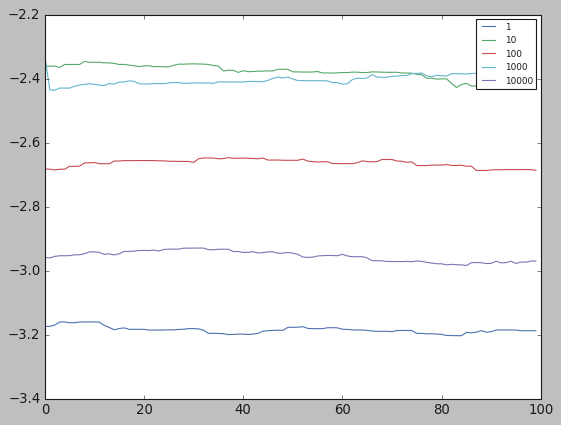

In [148]:
mpl.style.use('classic')
plt.rc('legend', fontsize=8)

temps = [1, 10, 100, 1000, 10000]
i=1
for t in temps:
    schedule = mlrose.ArithDecay(init_temp=t, decay=0.0001, min_temp=0.001)
    estimator = mlrose.NeuralNetwork(hidden_nodes=[10], activation='sigmoid', \
                                     algorithm='simulated_annealing', max_iters=100, \
                                     bias=True, is_classifier=True, learning_rate=0.1, schedule=schedule, \
                                     early_stopping=False, clip_max=5, max_attempts=10, \
                                     random_state=i, curve=True)
    i+=1
    estimator.fit(X_train, y_train)
    plt.plot(estimator.fitness_curve, label=t)
plt.legend(temps);

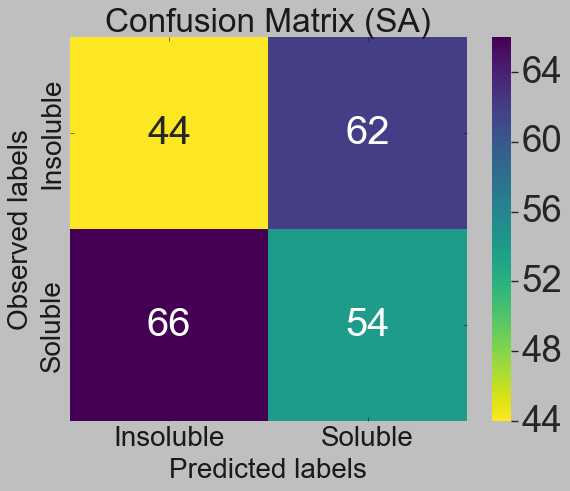

In [181]:
# Confusion matrix after tuning hyperparameters
cm = confusion_matrix(y_test, y_test_pred)

ax = plt.subplot()
sns.set(font_scale=3.0)
sns.heatmap(cm, annot=True, ax=ax, cmap="viridis_r", fmt="g");  

# Labels, title and ticks
label_font = {'size':'25'} 
ax.set_xlabel('Predicted labels', fontdict=label_font);
ax.set_ylabel('Observed labels', fontdict=label_font);

title_font = {'size':'30'}
ax.set_title('Confusion Matrix (SA)', fontdict=title_font);

ax.tick_params(axis='both', which='major', labelsize=25)  # Adjust to fit
ax.xaxis.set_ticklabels(['Insoluble', 'Soluble']);
ax.yaxis.set_ticklabels(['Insoluble', 'Soluble']);
plt.savefig('ds2_nn_sa_fig4', bbox_inches='tight')
plt.show()

Traning accuracy is 0.564190687361419
Test accuracy is 0.5765486725663717
Training time is 9.001805758476257 s


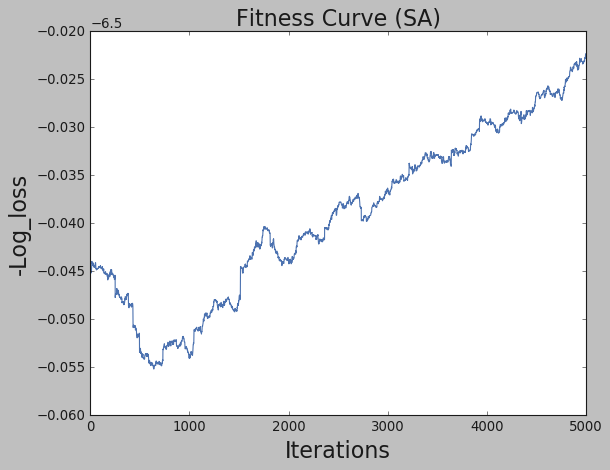

In [183]:
# Initialize MLrose model and train with simulated annealing
mpl.style.use('classic')

states = [1, 3, 30, 35, 2, 72, 45, 27, 87, 61] #pre-generated randome numbers

training_score = []
test_score = []
train_time = []

for s in states:
    start = time.time()
    schedule = mlrose.GeomDecay(init_temp = 1000, decay=0.99, min_temp=0.001)
    nn_model2 = mlrose.NeuralNetwork(hidden_nodes=[10], activation='identity', \
                                 algorithm='simulated_annealing', max_iters=5000, \
                                 bias=True, is_classifier=True, learning_rate=0.001, schedule=schedule, \
                                 early_stopping=False, clip_max=1000, max_attempts=100, \
                                 random_state=s, curve=True)
    nn_model2.fit(X_train, y_train)
    
    train_time.append(time.time() - start)
    y_train_pred = nn_model2.predict(X_train)
    training_score.append(accuracy_score(y_train, y_train_pred))
    y_test_pred = nn_model2.predict(X_test)
    test_score.append(accuracy_score(y_test, y_test_pred))
    
print('Traning accuracy is {}'.format(np.mean(training_score)))
print('Test accuracy is {}'.format(np.mean(test_score)))
print('Training time is {} s'.format(np.mean(train_time)))

plt.plot(nn_model2.fitness_curve)
plt.title('Fitness Curve (SA)', fontsize=20)
plt.xlabel('Iterations', fontsize=20)
plt.ylabel('-Log_loss', fontsize=20)
plt.savefig('ds2_sa_fig3', bbox_inches='tight')

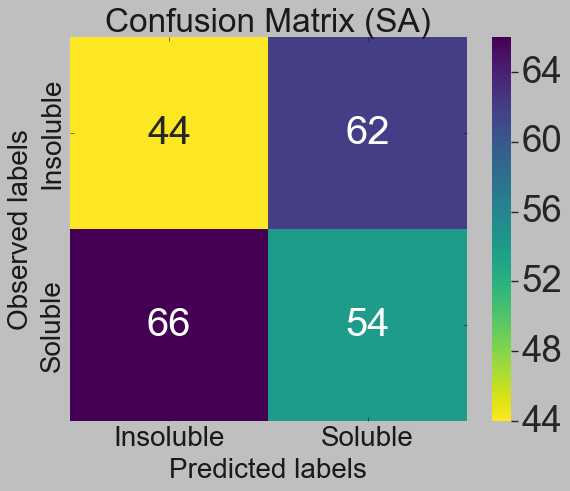

In [184]:
# Confusion matrix after tuning hyperparameters
cm = confusion_matrix(y_test, y_test_pred)

ax = plt.subplot()
sns.set(font_scale=3.0)
sns.heatmap(cm, annot=True, ax=ax, cmap="viridis_r", fmt="g");  

# Labels, title and ticks
label_font = {'size':'25'} 
ax.set_xlabel('Predicted labels', fontdict=label_font);
ax.set_ylabel('Observed labels', fontdict=label_font);

title_font = {'size':'30'}
ax.set_title('Confusion Matrix (SA)', fontdict=title_font);

ax.tick_params(axis='both', which='major', labelsize=25)  # Adjust to fit
ax.xaxis.set_ticklabels(['Insoluble', 'Soluble']);
ax.yaxis.set_ticklabels(['Insoluble', 'Soluble']);
plt.savefig('ds2_nn_sa_fig4', bbox_inches='tight')
plt.show()

# GA for NN

Traning accuracy is 0.7895787139689578
Test accuracy is 0.7827433628318584
Training time is 28.83828408718109 s


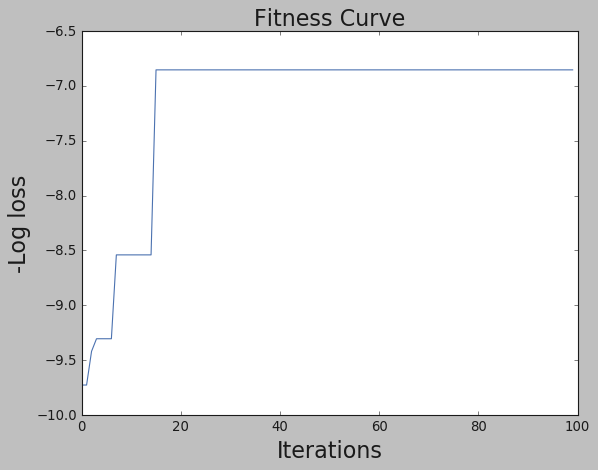

In [160]:
# Initialize MLrose model and train with genetic algorithm
mpl.style.use('classic')

states = [19, 22, 30, 35, 2, 72, 45, 27, 87, 61] #pre-generated randome numbers

training_score = []
test_score = []
train_time = []

for s in states:
    start = time.time()
    nn_model3 = mlrose.NeuralNetwork(hidden_nodes=[10], activation='relu', \
                                 algorithm='genetic_alg', max_iters=100, \
                                 bias=True, is_classifier=True, learning_rate=0.1, \
                                 early_stopping=False, max_attempts=100, \
                                 random_state=s, curve=True)

    nn_model3.fit(X_train, y_train)
    train_time.append(time.time() - start)
    y_train_pred = nn_model3.predict(X_train)
    training_score.append(accuracy_score(y_train, y_train_pred))
    y_test_pred = nn_model3.predict(X_test)
    test_score.append(accuracy_score(y_test, y_test_pred))
print('Traning accuracy is {}'.format(np.mean(training_score)))
print('Test accuracy is {}'.format(np.mean(test_score)))
print('Training time is {} s'.format(np.mean(train_time)))
plt.plot(nn_model3.fitness_curve)
plt.title('Fitness Curve (GA)', fontsize=20)
plt.xlabel('Iterations', fontsize=20)
plt.ylabel('-Log loss', fontsize=20)
plt.savefig('ga_nn_beforetuning', bbox_inches='tight')

- Genetic algorithm has the step-shape fitness curve
- It has flat plateaus for some iterations
- Large improvements are observed in certain iterations due to the fitness of the whole populations improves at certain generation

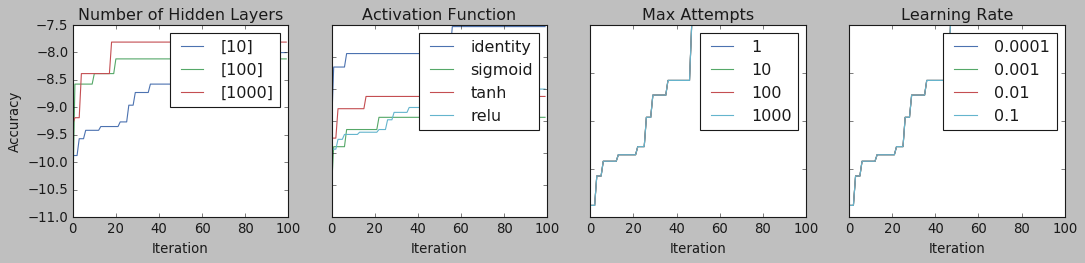

In [163]:
# MC plots
mpl.style.use('classic')
plt.rc('legend', fontsize=8)

fig, axes = plt.subplots(1, 4, figsize=(16, 3))
sizes = [[10], [100], [1000]]
for s in sizes:
    estimator = mlrose.NeuralNetwork(hidden_nodes=s, activation='relu', algorithm='genetic_alg', \
                                     max_iters=100, bias=True, is_classifier=True, learning_rate=0.1, \
                                     early_stopping=False, max_attempts=10, \
                                     random_state=1, curve=True)
    estimator.fit(X_train, y_train)
    axes[0].plot(estimator.fitness_curve)
axes[0].legend(sizes)
#axes[0].title('Number of Hidden Layers')

#test activation function
acts = ['identity', 'sigmoid', 'tanh', 'relu']
for a in acts:
    estimator = mlrose.NeuralNetwork(hidden_nodes=[10], activation=a, algorithm='genetic_alg', \
                                     max_iters=100, bias=True, is_classifier=True, learning_rate=0.1, \
                                     early_stopping=False, max_attempts=10, \
                                     random_state=1, curve=True)
    estimator.fit(X_train, y_train)
    axes[1].plot(estimator.fitness_curve, label='a')
axes[1].legend(acts)
#axes[1].title('Activation function')

#test clip max: range of weights
max_attempts = [1, 10, 100, 1000]
for m in max_attempts:
    estimator = mlrose.NeuralNetwork(hidden_nodes=[10], activation='relu', algorithm='genetic_alg', \
                                     max_iters=100, bias=True, is_classifier=True, learning_rate=0.1, \
                                     early_stopping=False, max_attempts=m, \
                                     random_state=1, curve=True)
    estimator.fit(X_train, y_train)
    axes[2].plot(estimator.fitness_curve, label=m)
axes[2].legend(max_attempts)

learn_rate = [0.0001, 0.001, 0.01, 0.1]
for l in learn_rate:
    estimator = mlrose.NeuralNetwork(hidden_nodes=[10], activation='relu', \
                                     algorithm='genetic_alg', max_iters=100, \
                                     bias=True, is_classifier=True, learning_rate=l, \
                                     early_stopping=False, max_attempts=10, \
                                     random_state=1, curve=True)
    estimator.fit(X_train, y_train)
    axes[3].plot(estimator.fitness_curve, label=l)
axes[3].legend(learn_rate)

#axes[2].title('Solvers')
axes[0].set_title('Number of Hidden Layers')
axes[1].set_title('Activation Function')
axes[2].set_title('Max Attempts')
axes[3].set_title('Learning Rate')

for ax in axes:
    ax.set(xlabel='Iteration', ylabel='Accuracy')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axes:
    ax.label_outer()

plt.savefig('ds2_nn_fig4', bbox_inches='tight')

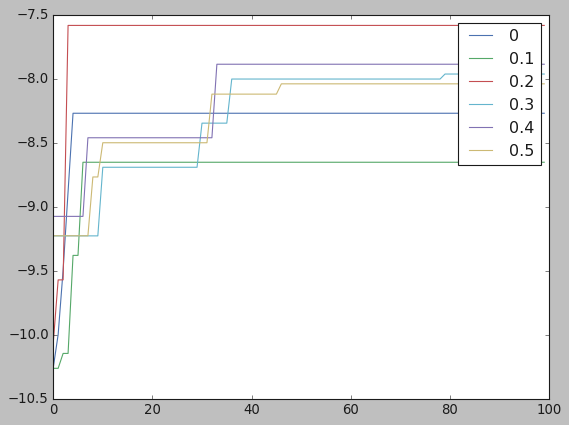

In [164]:
mpl.style.use('classic')
probs = [0, 0.1, 0.2, 0.3, 0.4, 0.5]
for p in probs:
    estimator = mlrose.NeuralNetwork(hidden_nodes=[10], activation='relu', \
                                     algorithm='genetic_alg', max_iters=100, \
                                     bias=True, is_classifier=True, learning_rate=0.1, mutation_prob=p,\
                                     early_stopping=False, max_attempts=10, \
                                     random_state=0, curve=True)
    estimator.fit(X_train, y_train)
    plt.plot(estimator.fitness_curve, label=p)
plt.legend(probs)

Traning accuracy is 0.7849223946784922
Test accuracy is 0.8097345132743363
Training time is 116.74331784248352 s


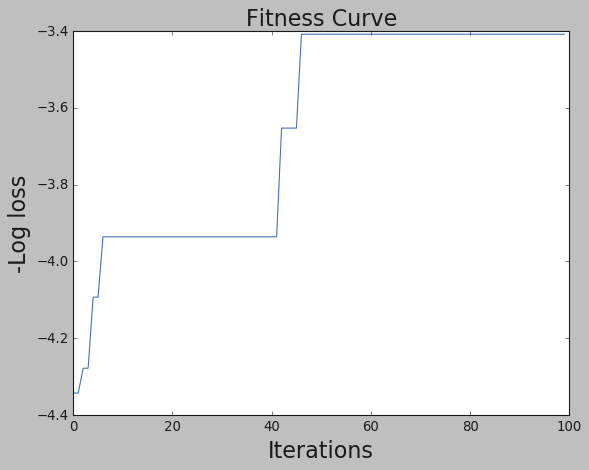

In [77]:
# Initialize MLrose model and train with genetic algorithm
mpl.style.use('classic')
states = [19, 22, 30, 35, 2, 72, 45, 27, 87, 61] #pre-generated randome numbers

training_score = []
test_score = []
train_time = []
for s in states:
    nn_model3 = mlrose.NeuralNetwork(hidden_nodes=[100], activation='identity', \
                                 algorithm='genetic_alg', max_iters=100, \
                                 bias=True, is_classifier=True, learning_rate=0.1, mutation_prob=0.2,\
                                 early_stopping=False, clip_max=1, max_attempts=100, \
                                 random_state=s, curve=True)

    start = time.time()
    nn_model3.fit(X_train, y_train)
    train_time.append(time.time() - start)
    y_train_pred = nn_model3.predict(X_train)
    training_score.append(accuracy_score(y_train, y_train_pred))
    y_test_pred = nn_model3.predict(X_test)
    test_score.append(accuracy_score(y_test, y_test_pred))
print('Traning accuracy is {}'.format(np.mean(training_score)))
print('Test accuracy is {}'.format(np.mean(test_score)))
print('Training time is {} s'.format(np.mean(train_time)))
plt.plot(nn_model3.fitness_curve)
plt.title('Fitness Curve (GA)', fontsize=20)
plt.xlabel('Iterations', fontsize=20)
plt.ylabel('-Log loss', fontsize=20)
plt.savefig('ga_nn_aftertuning_id', bbox_inches='tight')

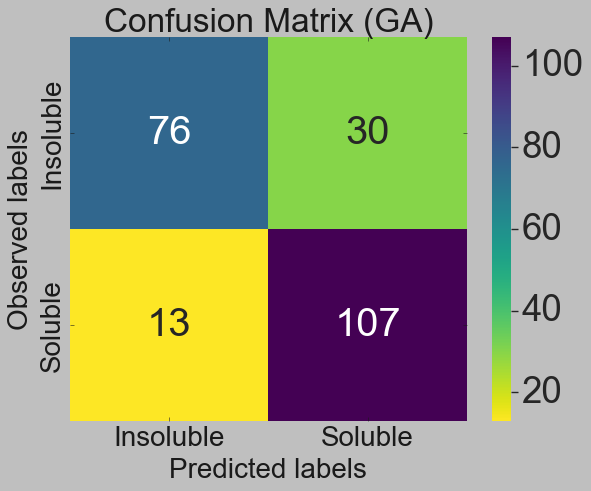

In [78]:
# Confusion matrix after tuning hyperparameters
cm = confusion_matrix(y_test, y_test_pred)

ax = plt.subplot()
sns.set(font_scale=3.0)
sns.heatmap(cm, annot=True, ax=ax, cmap="viridis_r", fmt="g");  

# Labels, title and ticks
label_font = {'size':'25'} 
ax.set_xlabel('Predicted labels', fontdict=label_font);
ax.set_ylabel('Observed labels', fontdict=label_font);

title_font = {'size':'30'}
ax.set_title('Confusion Matrix (GA)', fontdict=title_font);

ax.tick_params(axis='both', which='major', labelsize=25)  # Adjust to fit
ax.xaxis.set_ticklabels(['Insoluble', 'Soluble']);
ax.yaxis.set_ticklabels(['Insoluble', 'Soluble']);
plt.savefig('ds2_nn_ga_fig1', bbox_inches='tight')
plt.show()

- after tuning, training accuracy is improved from 0.78 to 0.79
- test accuracy is improved from 0.778 to 0.81

Conclusion:

- For descriptors
- GA is better than random_hill_climbing and simulated_annealing, but takes much longer